# **Introduction**
****

In this notebook I made a Exploratory Data Analysis with visualization and Data Manipulation to end up with insights on the Data. Also I did a Machine Learning Predict on the movie revenue. Using concepts like:

**●** Regression Predict

**●** Web Scraping with BeautifulSoup

**●** Image on a Matplotlib graph with opencv

**●** Data Visualization Technics with Seaborn and Matplotlib

**●** Data Manipulation with pandas

**I hope you enjoy! If you have a constructive critic, leave a comment, it's a pleasure to help and improve together!**

# **Imports**
****

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np 
import pandas as pd 

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font = fm.FontProperties(fname = '../input/font-eras-demi/ERASDEMI.TTF')

# For Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.svm import LinearSVR

# For Web Scraping the images
from urllib.request import Request, urlopen, urlretrieve
import urllib
from bs4 import BeautifulSoup
import cv2

/kaggle/input/top-500-movies-budget/top-500-movies.csv
/kaggle/input/font-eras-demi/ERASDEMI.TTF


# **Understading the dataset**
****

In [2]:
movie_data = pd.read_csv('../input/top-500-movies-budget/top-500-movies.csv')
movie_data = movie_data.sort_values('worldwide_gross', ascending = False)
movie_data.head()

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
24,25,2009-12-17,Avatar,/movie/Avatar#tab=summary,237000000,785221649,2910370905,77025481.0,PG-13,Action,3461.0,162.0,2009.0
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
48,49,1997-12-18,Titanic,/movie/Titanic-(1997)#tab=summary,200000000,659363944,2207986545,28638131.0,PG-13,Drama,3265.0,194.0,1997.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0


In [3]:
movie_data.isna().sum()

rank                0
release_date        1
title               0
url                 0
production_cost     0
domestic_gross      0
worldwide_gross     0
opening_weekend    21
mpaa                8
genre               5
theaters           21
runtime            13
year                1
dtype: int64

In [4]:
movie_data.describe()

,rank,production_cost,domestic_gross,worldwide_gross,opening_weekend,theaters,runtime,year
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,4.790000e+02,479.000000,487.000000,499.000000
mean,250.500000,1.494954e+08,1.696114e+08,4.697776e+08,5.429206e+07,3659.770355,121.885010,2011.394790
std,144.481833,4.774040e+07,1.421642e+08,3.850620e+08,4.619796e+07,546.018902,22.399642,6.560688
min,1.000000,9.100000e+07,0.000000e+00,0.000000e+00,4.855800e+04,30.000000,76.000000,1991.000000
25%,125.750000,1.100000e+08,7.047110e+07,2.122188e+08,2.421873e+07,3378.500000,104.500000,2007.000000
50%,250.500000,1.400000e+08,1.318470e+08,3.671458e+08,4.167120e+07,3735.000000,120.000000,2012.000000
75%,375.250000,1.750000e+08,2.185998e+08,6.484251e+08,6.812391e+07,4065.000000,135.000000,2016.000000
max,500.000000,4.000000e+08,9.366622e+08,2.910371e+09,3.571150e+08,4802.000000,210.000000,2023.000000


<div style="fontsize=30;">Movies from 2022 don't have worldwide revenue yet, so it droped.</div>

In [5]:
movie_data_with_revenue = movie_data.query('worldwide_gross != 0')
print(len(movie_data) - len(movie_data_with_revenue))

8


# **Analyzing Movies Revenue**
****

## Most Successful Movies

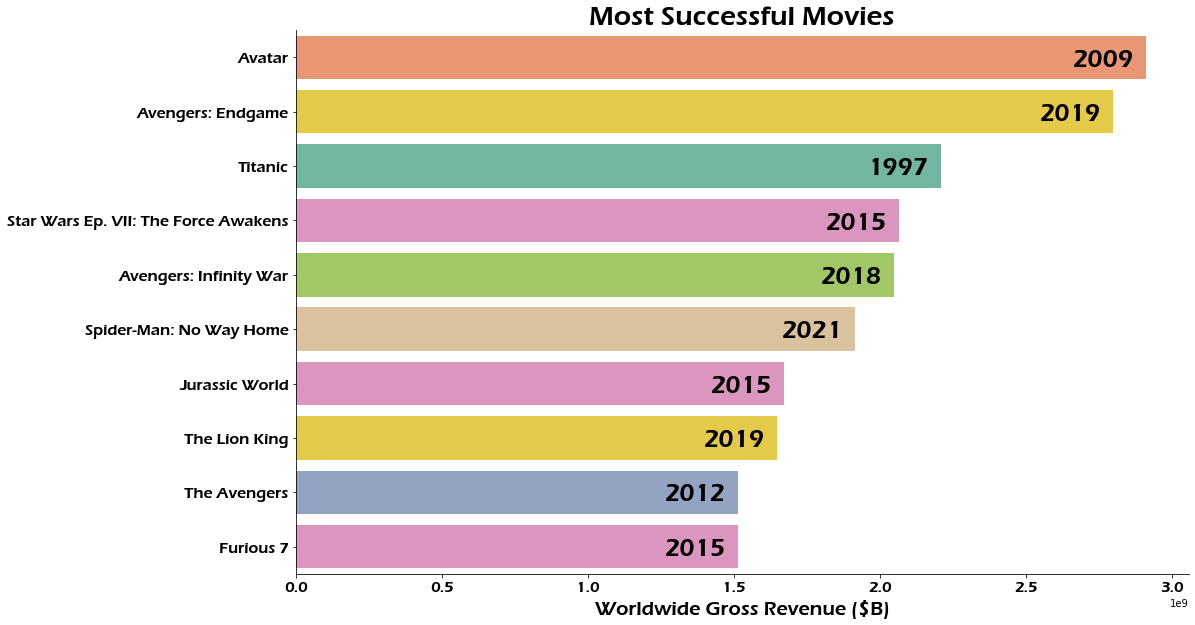

In [6]:
ax = sns.barplot(data = movie_data.head(10), x = 'worldwide_gross', 
                 y = 'title', hue = 'year', dodge=False, palette = 'Set2')
ax.figure.set_size_inches(16, 10)
ax.set_title('Most Successful Movies', fontsize=28, font=font)
ax.set_xlabel('Worldwide Gross Revenue ($B)', font=font, fontsize=20)
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize=16, font=font)
plt.yticks(fontsize=16, font=font)
ax.get_legend().set_visible(False)

i = 0
for line, row in movie_data.head(10).iterrows():
    year = str(int(row['year']))
    x = int(row['worldwide_gross']) - 2.5e8
    y = i + 0.15
    ax.text(s = year, x = x , y = y, font=font, fontsize=25)
    i += 1
    
plt.show()

In [7]:
movie_data_with_revenue['profit'] = movie_data_with_revenue['worldwide_gross'] - movie_data_with_revenue['production_cost']
movie_data_with_revenue['positive/negative'] = movie_data_with_revenue['profit'] \
                                        .apply(lambda x: 'Positive' if x > 0 else 'Negative')
display(movie_data_with_revenue.head(3))
display(movie_data_with_revenue.tail(3))

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,profit,positive/negative
24,25,2009-12-17,Avatar,/movie/Avatar#tab=summary,237000000,785221649,2910370905,77025481.0,PG-13,Action,3461.0,162.0,2009.0,2673370905,Positive
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0,2397800564,Positive
48,49,1997-12-18,Titanic,/movie/Titanic-(1997)#tab=summary,200000000,659363944,2207986545,28638131.0,PG-13,Drama,3265.0,194.0,1997.0,2007986545,Positive


,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,profit,positive/negative
85,86,2022-07-13,The Gray Man,/movie/Gray-Man-The-(2022)#tab=summary,200000000,0,451178,NaN,PG-13,Thriller/Suspense,NaN,129.0,2022.0,-199548822,Negative
234,235,2021-11-04,Red Notice,/movie/Red-Notice-(2020)#tab=summary,150000000,0,173638,NaN,PG-13,Action,NaN,115.0,2021.0,-149826362,Negative
464,465,2020-12-09,The Midnight Sky,/movie/Midnight-Sky-The-(2020)#tab=summary,100000000,0,75615,NaN,PG-13,Adventure,NaN,118.0,2020.0,-99924385,Negative


In [8]:
movie_data_with_revenue = movie_data_with_revenue.sort_values('profit', ascending = False)

In [9]:
movies_with_highest_lowest_profit = pd.concat([movie_data_with_revenue.head(5), movie_data_with_revenue.tail(5)])
movies_with_highest_lowest_profit

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,profit,positive/negative
24,25,2009-12-17,Avatar,/movie/Avatar#tab=summary,237000000,785221649,2910370905,77025481.0,PG-13,Action,3461.0,162.0,2009.0,2673370905,Positive
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0,2397800564,Positive
48,49,1997-12-18,Titanic,/movie/Titanic-(1997)#tab=summary,200000000,659363944,2207986545,28638131.0,PG-13,Drama,3265.0,194.0,1997.0,2007986545,Positive
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0,1758615817,Positive
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0,1748359754,Positive
234,235,2021-11-04,Red Notice,/movie/Red-Notice-(2020)#tab=summary,150000000,0,173638,NaN,PG-13,Action,NaN,115.0,2021.0,-149826362,Negative
179,180,2019-11-01,The Irishman,/movie/Irishman-The-(2019)#tab=summary,159000000,0,910234,NaN,R,Drama,NaN,210.0,2019.0,-158089766,Negative
140,141,2022-03-10,Turning Red,/movie/Turning-Red-(2022)#tab=summary,175000000,0,10965045,NaN,PG,Adventure,NaN,100.0,2022.0,-164034955,Negative
84,85,2021-07-02,The Tomorrow War,/movie/Tomorrow-War-The#tab=summary,200000000,0,19220000,NaN,PG-13,Action,NaN,140.0,2021.0,-180780000,Negative
85,86,2022-07-13,The Gray Man,/movie/Gray-Man-The-(2022)#tab=summary,200000000,0,451178,NaN,PG-13,Thriller/Suspense,NaN,129.0,2022.0,-199548822,Negative


## Movies with the highest Profit / Loss

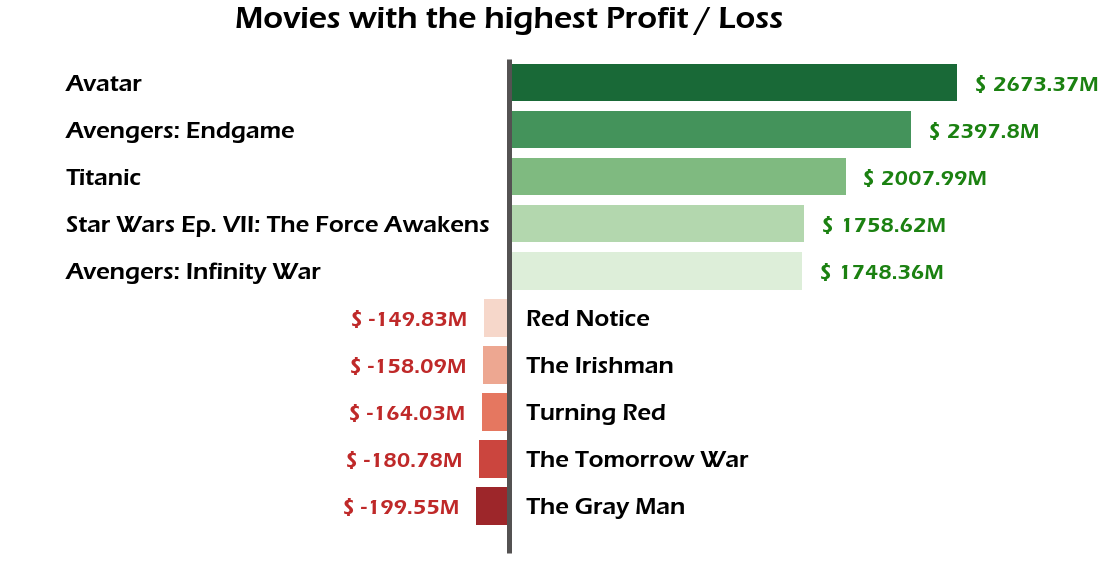

In [10]:
# List of Colors
palette = list(sns.color_palette("Greens_r", 5)) + list(sns.color_palette("Reds", 5))

ax = sns.barplot(data = movies_with_highest_lowest_profit, x = 'profit', y = 'title', 
                 palette = palette, dodge=False)
ax.figure.set_size_inches(18, 10)
ax.set_title('Movies with the highest Profit / Loss', fontsize=32, font=font)
plt.xlim(-3e9, 3e9)
plt.axis('off')

i = 0
for index, row in movies_with_highest_lowest_profit.iterrows():
    # Movie Title
    name = row['title']
    profit = "$ " + str(round(row['profit'] / 1e6, 2)) + "M"
    x_name = 1e8 if row['positive/negative'] == 'Negative' else -2.65e9
    y = i + 0.15
    plt.text(s = name, x = x_name, y = y, font=font, fontsize=24)
    
    # Profit Values
    position = 1e8 if row['positive/negative'] == 'Positive' else -8e8
    x_profit = int(row['profit']) + position
    color = '#1b8111' if row['positive/negative'] == 'Positive' else '#bf2929'
    plt.text(s = profit, x = x_profit, y = y, font=font, fontsize=22, color = color)
    i += 1

# Line that Divides in the half
plt.vlines(x = 0, ymin=-0.5, ymax=10, linewidth=5, color= '#545252')

plt.show()

## Analyzing the opening weekend impact on Total Gross Revenue

Movies with most **explosive opening weekend** in comparision with the total gross revenue.

Movies from 2022 don't have data (NaN) on opening weekend revenue, so it droped.

In [11]:
movie_data_with_revenue['opening/total'] = movie_data_with_revenue['opening_weekend'] / movie_data_with_revenue['worldwide_gross']
movie_data_with_revenue = movie_data_with_revenue.sort_values('opening/total', ascending = False)
movie_data_with_revenue = movie_data_with_revenue.dropna()

In [12]:
opening_total_main_movies = pd.concat([movie_data_with_revenue.head(5), movie_data_with_revenue.tail(5)])
opening_total_main_movies

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,profit,positive/negative,opening/total
468,469,2018-11-21,Robin Hood,/movie/Robin-Hood-(2018)#tab=summary,99000000,30824628,85210012,36063385.0,PG-13,Action,3505.0,139.0,2018.0,-13789988,Negative,0.423229
496,497,2004-04-09,The Alamo,/movie/Alamo-The-(2004)#tab=summary,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004.0,-68088638,Negative,0.381605
433,434,2009-10-16,Where the Wild Things Are,/movie/Where-the-Wild-Things-Are#tab=summary,100000000,77233467,99123656,32695407.0,PG,Adventure,3735.0,100.0,2009.0,-876344,Negative,0.329845
262,263,2009-03-06,Watchmen,/movie/Watchmen#tab=summary,138000000,107509799,186976250,55214334.0,R,Action,3611.0,161.0,2009.0,48976250,Positive,0.295301
81,82,2020-02-28,Onward,/movie/Onward-(2020)#tab=summary,200000000,61555145,133317030,39119861.0,PG,Adventure,4310.0,114.0,2020.0,-66682970,Negative,0.293435
482,483,2009-12-11,The Lovely Bones,/movie/Lovely-Bones-The#tab=summary,95000000,44114232,94894448,116616.0,PG-13,Drama,2638.0,135.0,2009.0,-105552,Negative,0.001229
475,476,2001-12-28,Black Hawk Down,/movie/Black-Hawk-Down#tab=summary,95000000,108638745,159691085,179823.0,R,Action,3143.0,144.0,2001.0,64691085,Positive,0.001126
269,270,2015-12-25,The Revenant,/movie/Revenant-The-(2015)#tab=summary,135000000,183637894,532938302,474560.0,R,Adventure,3711.0,156.0,2015.0,397938302,Positive,0.000890
463,464,2012-01-20,Jin líng shí san chai,/movie/Jin-ling-shi-san-chai#tab=summary,100000000,311434,98227017,48558.0,R,Drama,30.0,141.0,2012.0,-1772983,Negative,0.000494
191,192,2013-11-22,Frozen,/movie/Frozen-(2013)#tab=summary,150000000,400953009,1261788407,243390.0,PG,Musical,3742.0,102.0,2013.0,1111788407,Positive,0.000193


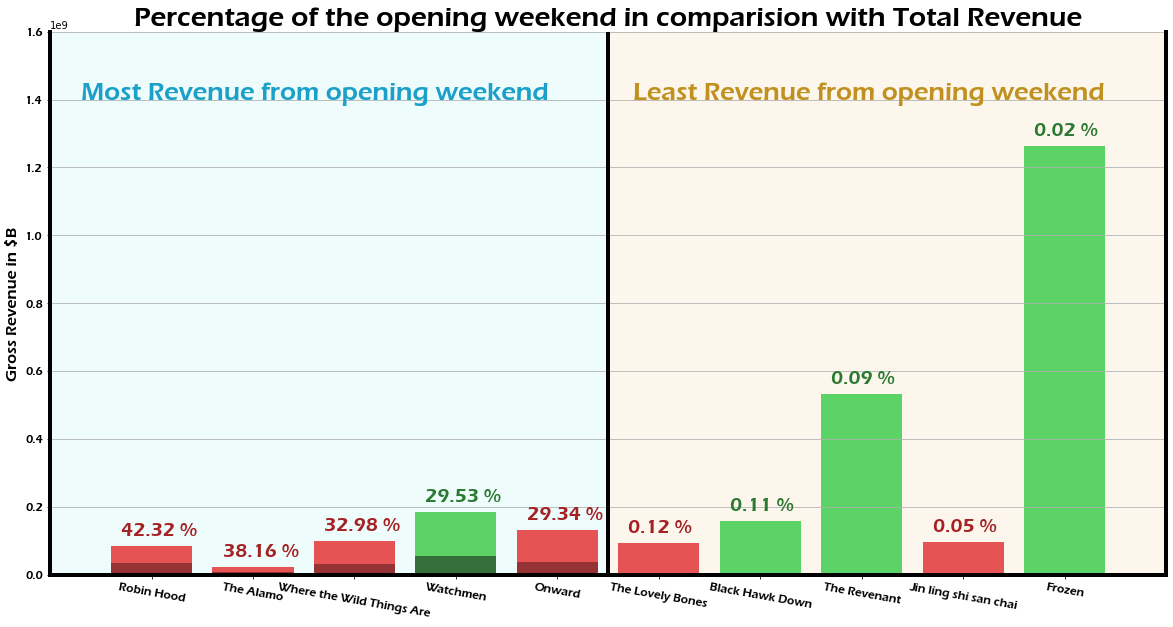

In [13]:
plt.axvspan(xmin=-1, xmax=4.5, alpha=0.1, color='#68EAE7')
plt.axvspan(xmin=4.5, xmax=10, alpha=0.1, color='#E5AB52')
plt.grid(True)

ax = sns.barplot(data = opening_total_main_movies, x = 'title', y = 'worldwide_gross', 
                 palette = ['#FF3A3D', '#48E756'], hue = 'positive/negative', dodge=False)

sns.barplot(data = opening_total_main_movies, x = 'title', y = 'opening_weekend', 
            palette = ['#A52224', '#2B7A32'], hue = 'positive/negative', dodge=False)

ax.get_legend().set_visible(False)

ax.set_xlabel('')
ax.set_ylabel('Gross Revenue in $B', font=font, fontsize=16)
ax.set_title('Percentage of the opening weekend in comparision with Total Revenue', font = font, fontsize=28)

plt.xticks(fontsize=12, font=font, rotation = 350)
plt.yticks(fontsize=12, font=font)

plt.ylim(0, 1.6e9)
plt.xlim(-1, 10)

i = 0
for index, row in opening_total_main_movies.iterrows():
    percent = str(round(row['opening/total'] * 100, 2)) + " %"
    x = i - 0.3
    y = int(row['worldwide_gross']) + 3e7
    color = '#2B7A32' if row['positive/negative'] == 'Positive' else '#A52224'
    plt.text(s = percent, x = x, y = y, font = font, fontsize=20, color = color)
    i += 1

    
ax.spines['right'].set(linewidth = 4)
ax.spines['top'].set_visible(False)
ax.spines['left'].set(linewidth = 4)
ax.spines['bottom'].set(linewidth = 4)

plt.vlines(x = 4.5, ymin = 0, ymax = 1.6e9, linewidth=4, color = 'k')

plt.text(s = 'Most Revenue from opening weekend', x = -0.7, y = 1.4e9, font=font, fontsize=26, color='#1BA0C9')
plt.text(s = 'Least Revenue from opening weekend', x = 4.75, y = 1.4e9, font=font, fontsize=26, color='#C1911F')


ax.figure.set_size_inches(20, 10)

plt.show()

**Robin Hood** had **42.32%** of the total gross revenue in the opening weekend and had a loss in the total revenue, meaning that it was critized a lot, moving people away from watching it in the theater. In the other hand, **Frozen** only had **0.02%** of the total gross revenue on the opening weekend and had a great profit, meaning that it was acclaimed by both critics and users.

## The impact of the number of Theaters

Firstly, let's see if the number of theater has a high correlation with the domestic gross revenue. The theaters number are from the domestic theaters, so it consider the domestic revenue to calculate the revenue per theater.

In [14]:
movie_data_with_revenue[['domestic_gross', 'theaters']].corr()

,domestic_gross,theaters
domestic_gross,1.000000,0.542411
theaters,0.542411,1.000000


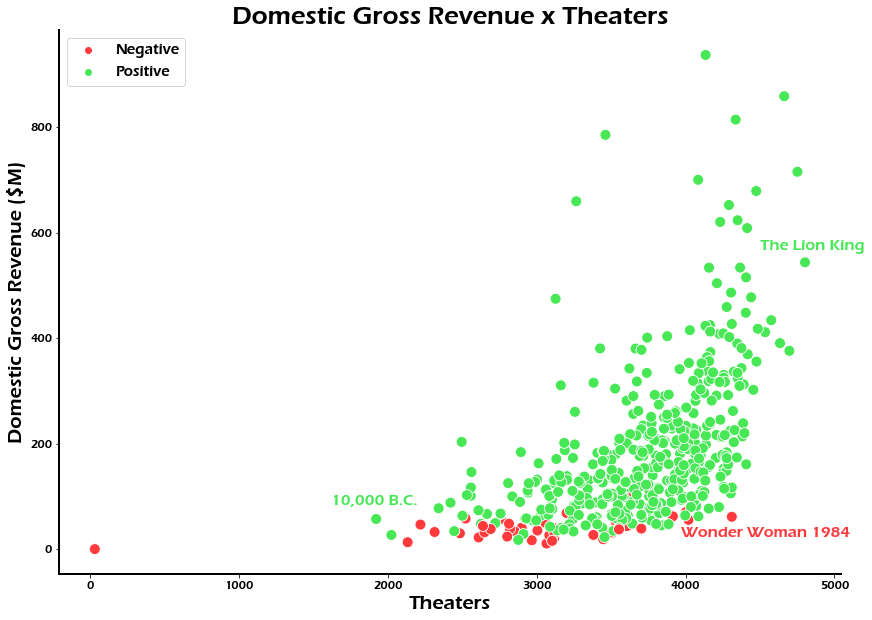

In [15]:
ax = sns.scatterplot(data = movie_data_with_revenue, x = 'theaters', 
                     y = movie_data_with_revenue['domestic_gross'] / 1e6, 
                     hue = 'positive/negative', palette = ['#FF3A3D', '#48E756'], s=120)
ax.figure.set_size_inches(14,10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set(linewidth = 2)
ax.spines['bottom'].set(linewidth = 2)

ax.set_title('Domestic Gross Revenue x Theaters', font=font, fontsize=26)
ax.set_ylabel('Domestic Gross Revenue ($M)', font=font, fontsize=20)
ax.set_xlabel('Theaters', font=font, fontsize=20)

plt.xticks(fontsize=12, font=font)
plt.yticks(fontsize=12, font=font)

#Legend
font_legend = fm.FontProperties(fname = '../input/font-eras-demi/ERASDEMI.TTF', size=15)
plt.legend(prop=font_legend, loc = 'upper left')

# Selecting the movie with loss with more theaters 
most_theaters_negative_movie, theaters, gross = movie_data_with_revenue.groupby('positive/negative').max() \
[['title', 'theaters', 'worldwide_gross']].iloc[0]

# Selecting the movie with profit with less theaters
least_theaters_positive_movie, theaters_2, gross_2 = movie_data_with_revenue.groupby('positive/negative').min() \
[['title', 'theaters', 'worldwide_gross']].iloc[1]

# Selecting the movie with more theaters
most_theater_movie, theaters_3, gross_3 = movie_data_with_revenue.sort_values('theaters', ascending=False) \
[['title', 'theaters', 'worldwide_gross']].iloc[0]

plt.text(s = most_theaters_negative_movie, x = theaters - 340, y = gross / 1e6 - 150, 
         font=font, fontsize=16, color = '#FF3A3D')

plt.text(s = least_theaters_positive_movie, x = theaters_2 - 300, y = gross_2 / 1e6 - 20, 
         font=font, fontsize=16, color = '#48E756')

plt.text(s = most_theater_movie, x = theaters_3 - 300, y = gross_3 / 1e6 - 1080, 
         font=font, fontsize=16, color = '#48E756')

plt.show()

**Wonder Woman** was the movie with the more theaters that had loss on gross revenue, while **10,000 BC** was the profitable one with less theaters. 

**The Lion King** had the most theaters in dataset.

Now, let's consider the domestic gross revenue per theater of the movies.

In [16]:
movie_data_with_revenue['gross_per_theater'] = movie_data_with_revenue['domestic_gross'] / movie_data_with_revenue['theaters'] 
movie_data_with_revenue.sort_values('gross_per_theater', ascending = False, inplace=True)

In [17]:
gross_per_theater = pd.concat([movie_data_with_revenue.head(), movie_data_with_revenue.tail()])
gross_per_theater

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,profit,positive/negative,opening/total,gross_per_theater
24,25,2009-12-17,Avatar,/movie/Avatar#tab=summary,237000000,785221649,2910370905,77025481.0,PG-13,Action,3461.0,162.0,2009.0,2673370905,Positive,0.026466,226877.101705
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0,1758615817,Positive,0.120103,226575.284228
48,49,1997-12-18,Titanic,/movie/Titanic-(1997)#tab=summary,200000000,659363944,2207986545,28638131.0,PG-13,Drama,3265.0,194.0,1997.0,2007986545,Positive,0.012970,201949.140582
46,47,2021-12-14,Spider-Man: No Way Home,/movie/Spider-Man-No-Way-Home-(2021)#tab=summary,200000000,814108407,1912775610,260138569.0,PG-13,Action,4336.0,148.0,2021.0,1712775610,Positive,0.136001,187755.628921
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0,2397800564,Positive,0.127641,184121.192621
484,485,2014-12-19,Seventh Son,/movie/Seventh-Son#tab=summary,95000000,17725785,108874967,7217640.0,PG-13,Adventure,2875.0,102.0,2014.0,13874967,Positive,0.066293,6165.490435
458,459,2005-02-18,Son of the Mask,/movie/Son-of-the-Mask#tab=summary,100000000,17018422,59918422,7511675.0,PG,Adventure,2966.0,94.0,2005.0,-40081578,Negative,0.125365,5737.836143
233,234,2022-02-03,Moonfall,/movie/Moonfall-(2022)#tab=summary,150000000,19060660,59049032,9868997.0,PG-13,Action,3446.0,124.0,2022.0,-90950968,Negative,0.167132,5531.242020
459,460,2018-12-05,Mortal Engines,/movie/Mortal-Engines-(2018)#tab=summary,100000000,15951040,85480271,7559850.0,PG-13,Action,3103.0,128.0,2018.0,-14519729,Negative,0.088440,5140.522075
461,462,2021-10-13,The Last Duel,/movie/Last-Duel-The#tab=summary,100000000,10853945,30055233,4759151.0,R,Drama,3065.0,153.0,2021.0,-69944767,Negative,0.158347,3541.254486


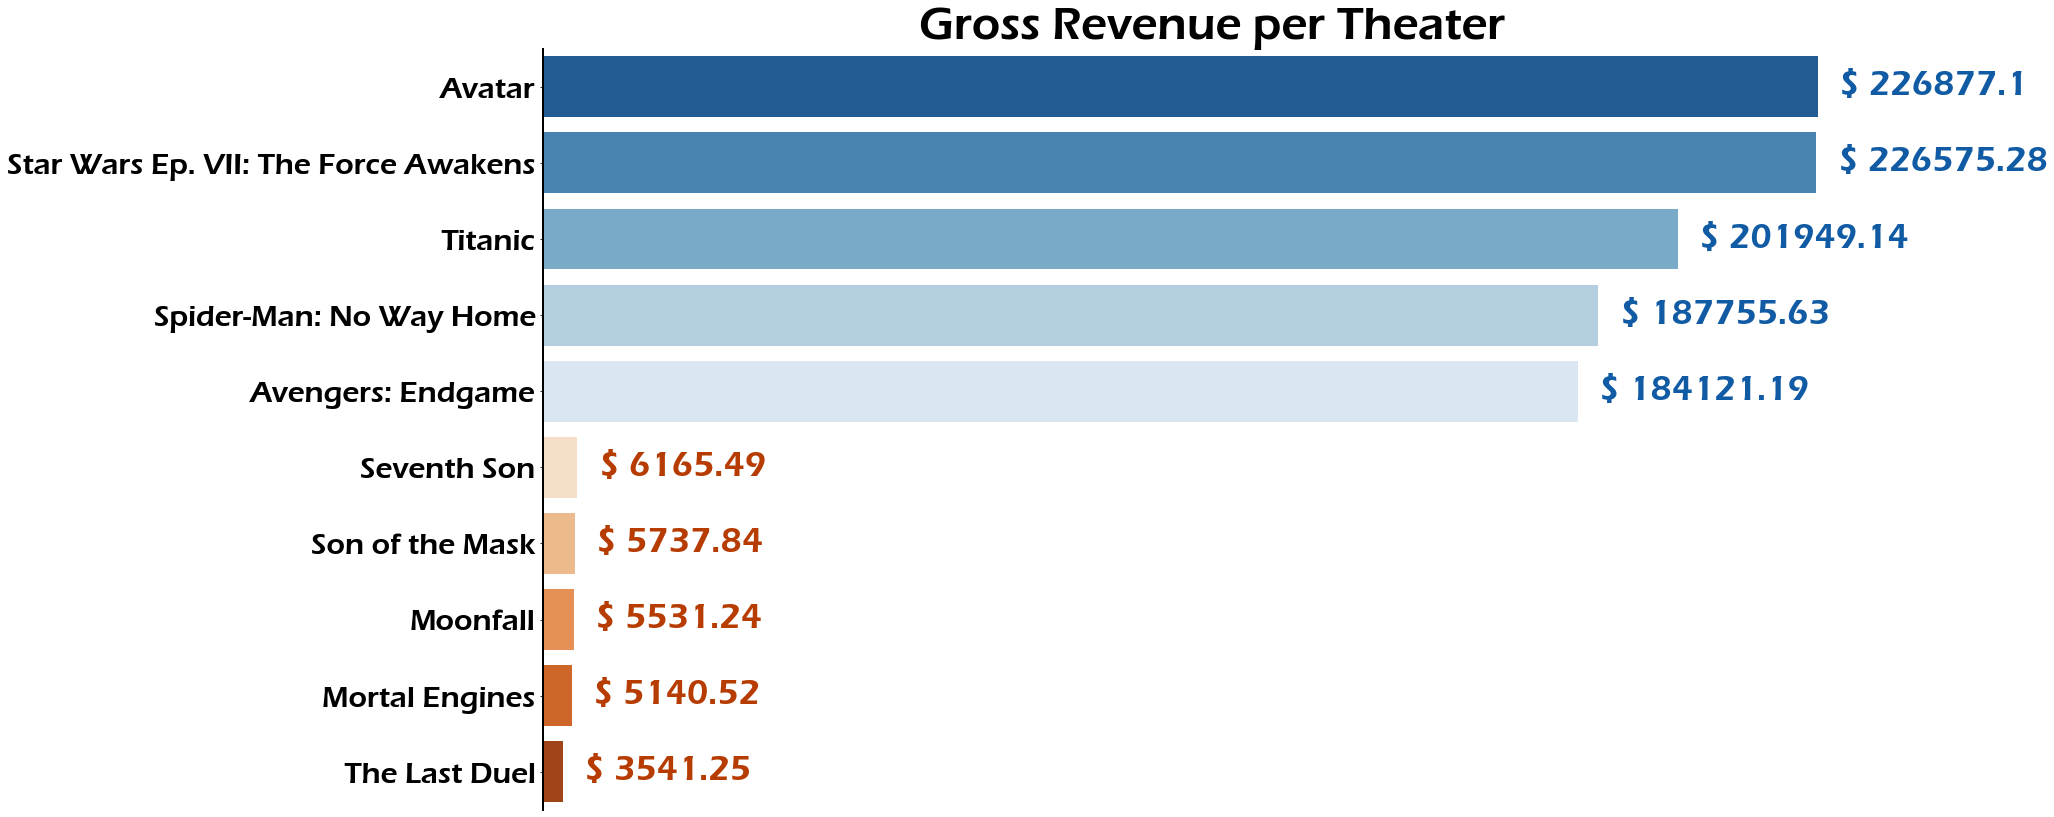

In [18]:
palette = list(sns.color_palette('Blues_r', 5) + sns.color_palette('Oranges', 5))

plt.figure(figsize=(24, 14))

ax = sns.barplot(data = gross_per_theater, x = 'gross_per_theater', y = 'title', palette = palette)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set(linewidth = 2)
ax.spines['bottom'].set_visible(False)

ax.set_title('Gross Revenue per Theater', font=font, fontsize=46)
ax.set_ylabel('')
ax.set_xlabel('')

i = 0
for index, row in gross_per_theater.iterrows():
    gross_theater = "$ " + str(round(row['gross_per_theater'], 2))
    x = row['gross_per_theater'] + 3800
    y = i + 0.1
    color = palette[0] if i < 5 else palette[-1]
    plt.text(s = gross_theater, x = x, y = y, font=font, fontsize=35, color = color)
    i+=1

plt.xticks([])
plt.yticks(fontsize=30, font=font)

plt.show()

**Successful movies** have a great revenue per theater, like **Marvel and Star Wars movies**. **Avatar** had an average of **226,877.10 dolars per theater**.
**The Last Duel only had 3,541.25 dolars per theater**.

# **Analyzing Movies by Year**
****

## Movies by Decade

This function is used to **find the poster** of the movie from the url that is in the dataset and turn it to a **image (.jpg) ready to be read by Matplotlib**, besides downloading the image for future use.

In [19]:
def show_image(movie_url, name, size_proportion):
    url = 'https://www.the-numbers.com' + str(movie_url) 
    
    headers = {'User-Agent': 'Mozilla/5.0'}
    req = Request(url, headers=headers)
    response = urlopen(req)
    html = response.read()
    
    soup = BeautifulSoup(html, 'html.parser')
    img = soup.find('div', id='poster')
    if img is None:
        return None
    else:
        img = img.img['src']
    
    fullname = str(name)+".jpg"
    urlretrieve(img,fullname)   
    
    picture = cv2.imread(fullname, cv2.COLOR_RGB2BGR)
    picture = cv2.cvtColor(picture, cv2.COLOR_BGR2RGB)
    
    size = (picture.shape[1] * size_proportion, picture.shape[0] * size_proportion)
    
    resized = cv2.resize(picture, (size[0], size[1]), interpolation = cv2.INTER_AREA)
    
    return resized

In [20]:
movie_data_with_revenue.sort_values('worldwide_gross', ascending=False, inplace=True)

Select the movies from each year and turn into a graph, **showing the most successful movie on the decade**.

In [21]:
def movies_years(min_year, max_year, number_of_movies=1):
    years = np.arange(min_year, max_year + 1, 1)
    data_for_year = pd.DataFrame()

    for year in years:
        year_data = movie_data_with_revenue.query('year == %d' % year)[['title', 'url', 'worldwide_gross', 'year']] \
        .iloc[:number_of_movies]
        data_for_year = pd.concat([data_for_year, year_data])
        
    return data_for_year

In [22]:
from_1991_to_2000 = movies_years(movie_data_with_revenue.year.min(), 2000)
from_2001_to_2010 = movies_years(2001, 2010)
from_2011_to_2021 = movies_years(2011, 2021)

In [23]:
def graph_for_year(dataset):
    most_sold = dataset.sort_values('worldwide_gross', ascending=False).iloc[0]
    img = show_image(most_sold['url'], most_sold['title'], 1)
    
    min_year = dataset.year.min()
    max_year = dataset.year.max()
    
    ax = sns.barplot(data = dataset, x = 'worldwide_gross', y = 'title', hue = 'year', dodge=False, palette='vlag')
    ax.figure.set_size_inches(24, 16) # 24, 16
    
    plt.xticks(font=font, fontsize = 18)
    plt.yticks(font=font, fontsize = 26)
    ax.get_legend().set_visible(False)
    
    plt.xlim(xmin=0, xmax=3.8e9)

    title = 'Most Successful Movie for each Year (%d - %d)' % (min_year, max_year)
    ax.set_title(title, font=font, fontsize=44)
    ax.set_ylabel('')
    ax.set_xlabel('Worldwide Gross Revenue ($B)', font=font, fontsize = 22)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set(linewidth = 3)
    ax.spines['bottom'].set(linewidth = 3)
    
    
    i = 0
    for index, row in dataset.iterrows():
        year = str(int(row['year']))
        x = row['worldwide_gross'] - 2.5e8 
        
        plt.text(s = year, x = x, y = i+0.1, font=font, fontsize=32)
        i+=1
    
    # Adding the Image for the decade Movie        
    newax = ax.figure.add_axes([0.5,0.4,0.45,0.45])
    newax.imshow(img)
    newax.axis('off')
    
    plt.show()

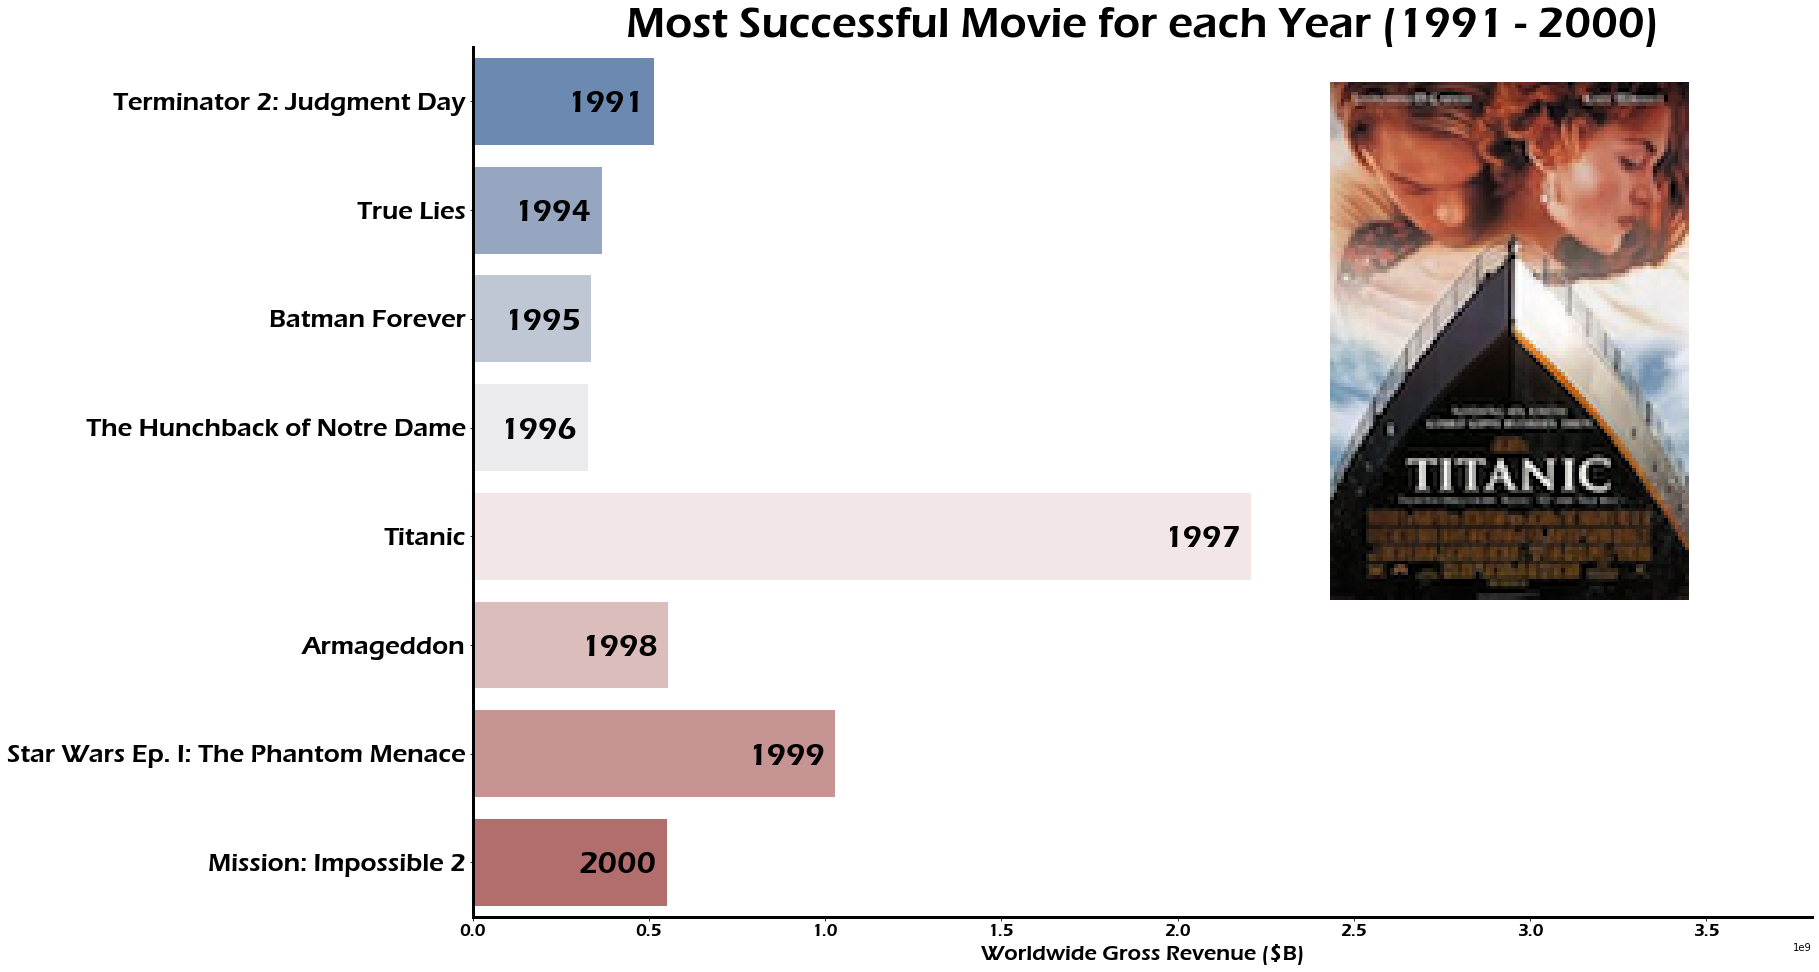

In [24]:
graph_for_year(from_1991_to_2000)

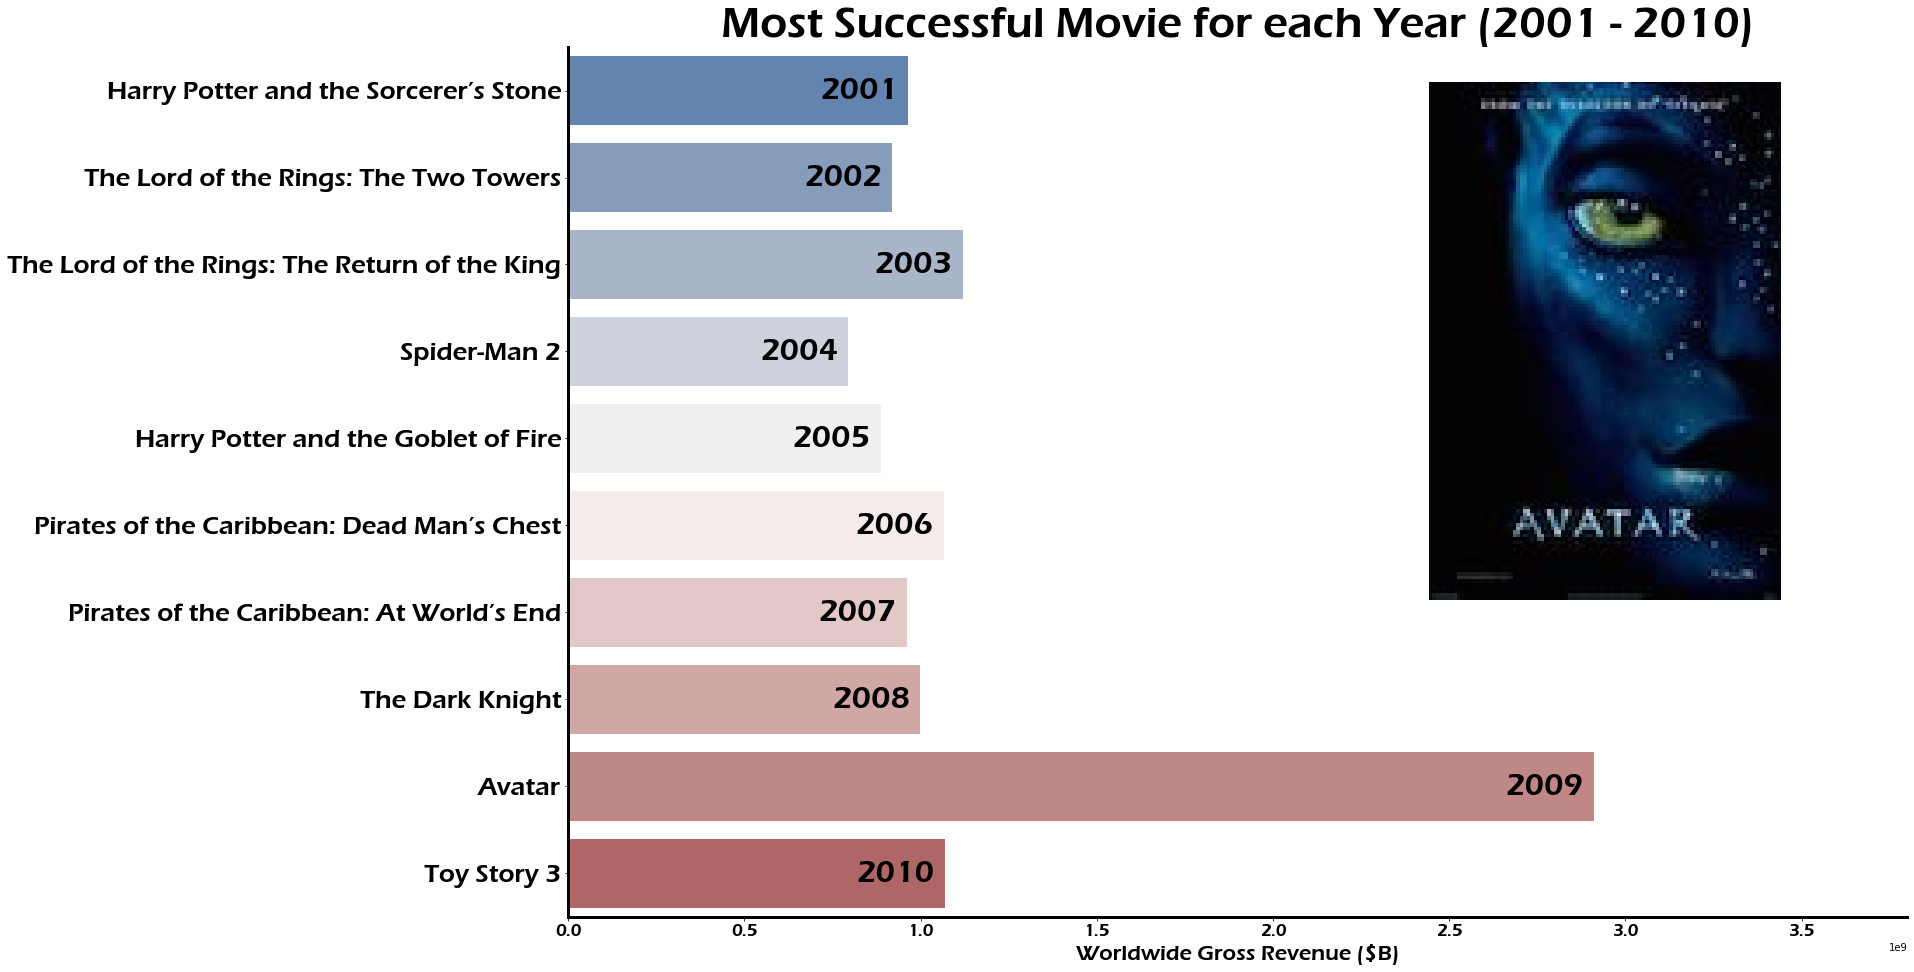

In [25]:
graph_for_year(from_2001_to_2010)

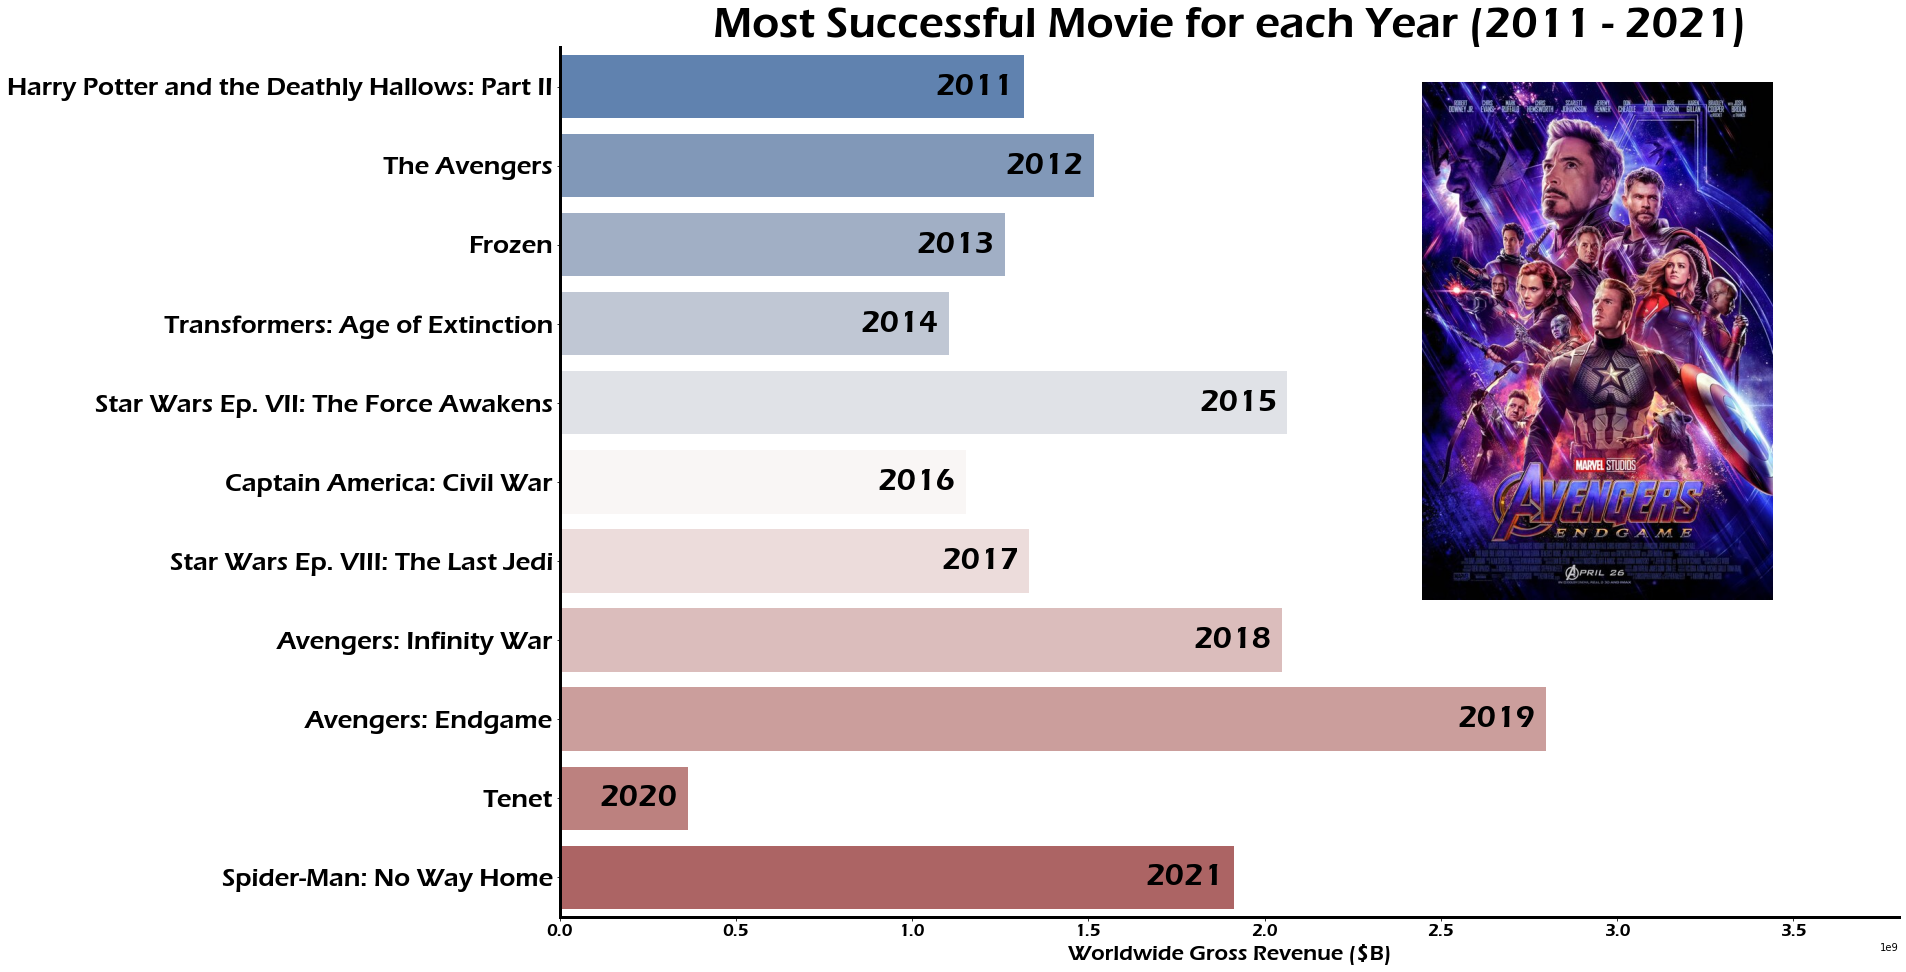

In [26]:
graph_for_year(from_2011_to_2021)

2011 to 2021 was a great decade for the movie industry, except from 2020 in reason to Lockdowns around the world, as it shows in the graph below.

**Titanic** was really successful movie, breaking records in the 1990's.

**Marvel** movies and **Star Wars** movies, both by Disney, dominated the 2010's.

In [27]:
group_by_year = movie_data_with_revenue.groupby('year').mean().reset_index()
group_by_year['worldwide_gross'] = group_by_year['worldwide_gross'] / 1e6
group_by_year.head(3)

,year,rank,production_cost,domestic_gross,worldwide_gross,opening_weekend,theaters,runtime,profit,opening/total,gross_per_theater
0,1991.0,416.0,100000000.0,203464105.0,515.376182,31765506.0,2495.0,136.0,415376182.0,0.061636,81548.739479
1,1994.0,423.0,100000000.0,146282411.0,365.300000,25869770.0,2561.0,141.0,265300000.0,0.070818,57119.254588
2,1995.0,277.0,137500000.0,136138666.0,300.387682,36978106.5,2656.5,128.5,162887682.0,0.118485,50038.965921


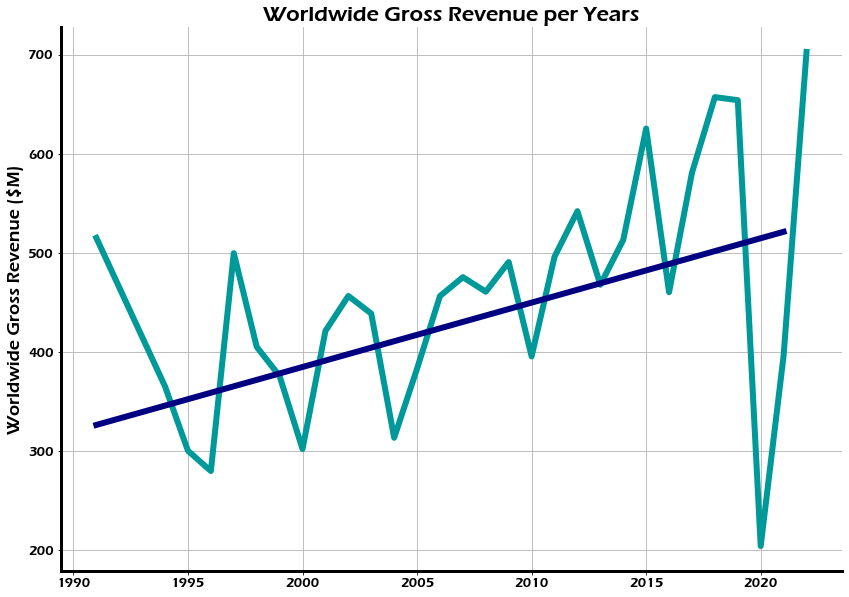

In [28]:
ax = sns.lineplot(data = group_by_year, x = 'year', y = 'worldwide_gross', linewidth=6, color='#009999')
ax.figure.set_size_inches(14, 10)
plt.grid(True)

plt.xticks(font=font, fontsize = 14)
plt.yticks(font=font, fontsize = 14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set(linewidth = 3)
ax.spines['bottom'].set(linewidth = 3)

ax.set_title('Worldwide Gross Revenue per Years', font=font, fontsize=22)
ax.set_ylabel('Worldwide Gross Revenue ($M)', font=font, fontsize=18)
ax.set_xlabel('')


# Regression Line
x1 = np.arange(group_by_year.year.min(), group_by_year.year.max(), 1)
x2 = np.arange(1, len(group_by_year) + 2, 1)
y = x2 * 6.5 + 320
ax.plot(x1, y, color = '#000080', linewidth=6)

plt.show()

**The movie industry grew during the years**, even with the down in 2020!

# **Considering the movie runtime**
****

Does the runtime have a correlation with the movie gross revenue?

In [29]:
movie_data_with_revenue[['runtime', 'worldwide_gross']].corr()

,runtime,worldwide_gross
runtime,1.000000,0.335474
worldwide_gross,0.335474,1.000000


What is the **longest movie**? What is the **shortest**?

In [30]:
sorted_runtime = movie_data_with_revenue.sort_values('runtime', ascending=False)
sorted_runtime = pd.concat([sorted_runtime.head(), sorted_runtime.tail()])

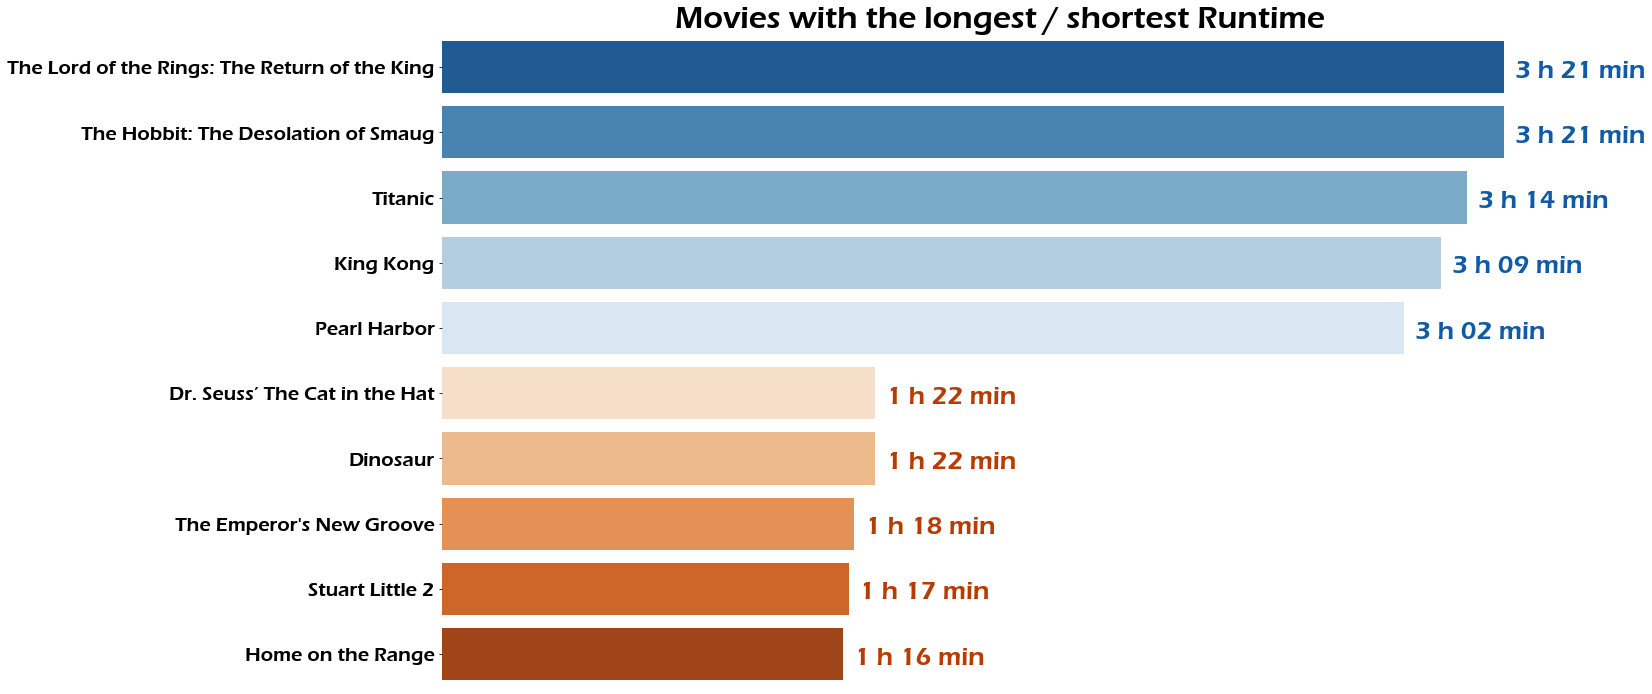

In [31]:
palette = list(sns.color_palette('Blues_r', 5) + sns.color_palette('Oranges', 5))

ax = sns.barplot(data = sorted_runtime, x = 'runtime', y = 'title', palette=palette)
ax.figure.set_size_inches(20, 12)

plt.xticks([])
plt.yticks(font=font, fontsize = 20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title('Movies with the longest / shortest Runtime', font=font, fontsize=32)
ax.set_ylabel('')
ax.set_xlabel('')

i = 0
for index, row in sorted_runtime.iterrows():
    hour, minute = row['runtime'] // 60, row['runtime'] % 60
    text = "%d h %02d min" % (hour, minute)
    x = row.runtime + 2
    
    color = palette[0] if i < 5 else palette[-1]
    plt.text(s=text, x = x, y = i + 0.15, font=font, fontsize=26, color=color)
    i += 1


plt.show()

It seems like movies made for **children as the target public** have the shortest runtime. It will confirm analyzing the genre average runtime, as shown in the graph below, **most children's movies are included in the genre comedy**.

In [32]:
group_by_genre = movie_data_with_revenue.groupby('genre').mean().reset_index()
group_by_genre.sort_values('runtime', ascending=False, inplace=True)

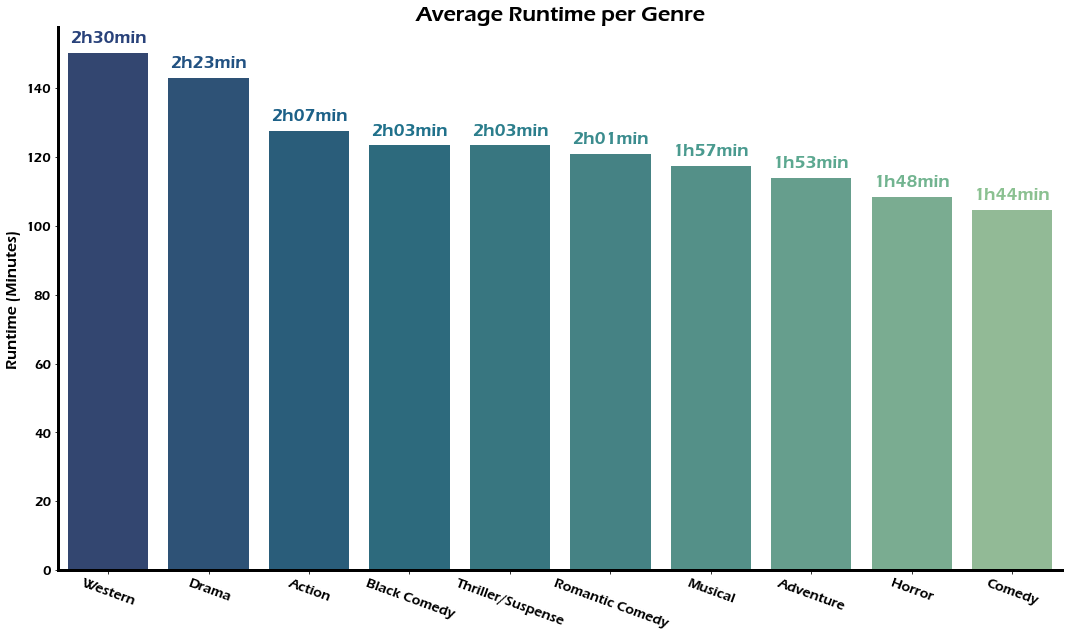

In [33]:
ax = sns.barplot(data = group_by_genre, y = 'runtime', x = 'genre', palette='crest_r')
ax.figure.set_size_inches(18, 10)

plt.xticks(rotation=340, font=font, fontsize=14)
plt.yticks(font=font, fontsize = 14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set(linewidth=3)
ax.spines['bottom'].set(linewidth=3)

ax.set_title('Average Runtime per Genre', font=font, fontsize=22)
ax.set_ylabel('Runtime (Minutes)', font=font, fontsize=16)
ax.set_xlabel('')

i = 0
for index, row in group_by_genre.iterrows():
    hour, minute = row['runtime'] // 60, row['runtime'] % 60
    text = "%dh%02dmin" % (hour, minute)
    y = row.runtime + 3
    
    color = sns.color_palette('crest_r', len(group_by_genre))[i]
    
    plt.text(s=text, x = i - 0.38, y = y, font=font, fontsize=18, color=color)
    i += 1


plt.show()

# **Analyzing the Genres**
****

Let's consider the more **profitable genres** from the average profit of each genre.

In [34]:
group_by_genre.sort_values('profit', ascending=False, inplace=True)
group_by_genre['profit'] = group_by_genre['profit'] / 1e6

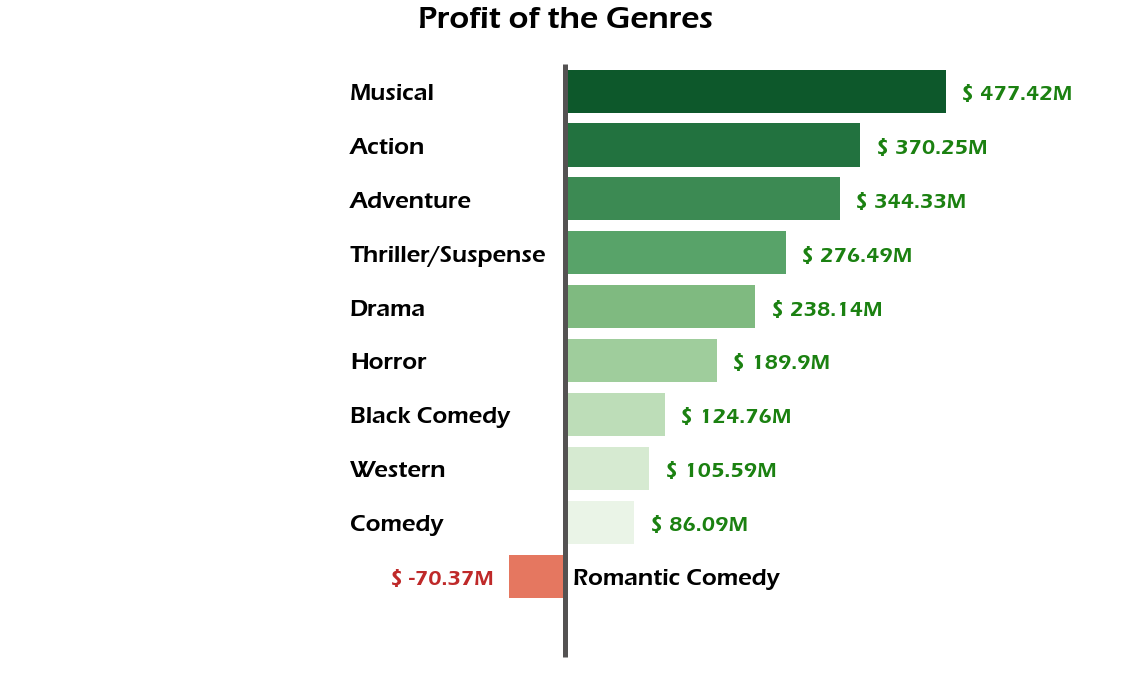

In [35]:
palette = list((sns.color_palette('Greens_r', len(group_by_genre) - 1)) + sns.color_palette('Reds', 1))

ax = sns.barplot(data=group_by_genre, x = 'profit', y = 'genre', palette=palette)
ax.figure.set_size_inches(20, 12)

ax.set_title('Profit of the Genres', fontsize=32, font=font)
plt.xlim(xmin = -700, xmax=700)
plt.axis('off')

i = 0
for index, row in group_by_genre.iterrows():
    # Genres
    name = row['genre']
    profit = "$ " + str(round(row['profit'], 2)) + "M"
    x_name = 10 if row['profit'] < 0 else -270
    y = i + 0.15
    plt.text(s = name, x = x_name, y = y, font=font, fontsize=24)
    
    # Profit Values
    position = 20 if row['profit'] > 0 else -150
    x_profit = int(row['profit']) + position
    color = '#1b8111' if row['profit'] > 0 else '#bf2929'
    plt.text(s = profit, x = x_profit, y = y, font=font, fontsize=22, color = color)
    i += 1

# Line that Divides in the half
plt.vlines(x = 0, ymin=-0.5, ymax=10.5, linewidth=5, color= '#545252')

plt.show()

It seems like **people don't like to go to theater to watch any kind of comedy**, while **like to go to watch musical movies**.

In [36]:
mpaa_and_genres = movie_data_with_revenue.groupby(['genre', 'mpaa']).count()['rank']
mpaa_and_genres = mpaa_and_genres.reset_index()

In [37]:
main_genres = mpaa_and_genres.query("genre in ['Action', 'Comedy', 'Drama']") # Main genres
main_genres = pd.concat([mpaa_and_genres.query("genre == 'Adventure'"), main_genres]) 
# Let the first be Adventure for the legend in the main figure

## Connecting the movie rating with the Genres 

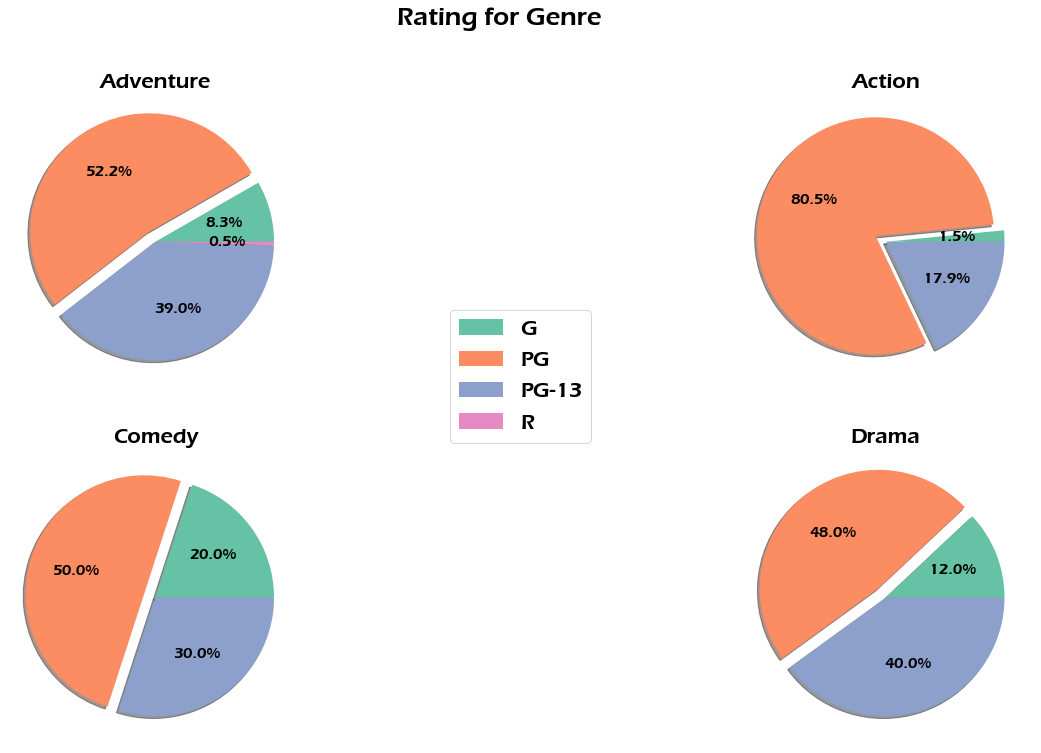

In [38]:
plt.rc('figure', figsize = (24, 12))
fig, ax = plt.subplots(2, 2)
colors = sns.color_palette('Set2', 4)
genres = main_genres.genre.unique()

for i, genre in enumerate(genres):
    # Organizing the index
    indexes = [0 if i < 2 else 1, 0 if i % 2 == 0 else 1]
    
    
    # Collect the data and explode the index with biggest value
    genre_data = main_genres.query('genre == "%s"' % genre)['rank'].values
    index_biggest_value_game_data = np.argmax(genre_data)
    local_explode = np.zeros(len(genre_data))
    local_explode[index_biggest_value_game_data] += 0.1

    # Create the pie for each game and set its title
    ax[indexes[0], indexes[1]].pie(genre_data, autopct = '%.1f%%', colors = colors, explode = local_explode, 
                                       textprops=dict(color="k", fontsize=16, font=font), shadow = True)

    ax[indexes[0], indexes[1]].set_title(genre, fontsize=22, font=font)


# Legend in the figure and a super title
font_legend = fm.FontProperties(fname = '../input/font-eras-demi/ERASDEMI.TTF', size=22)
                                          
fig.legend(main_genres['mpaa'].unique(), loc = 'center', prop=font_legend)
plt.suptitle('Rating for Genre', fontsize = 26, font=font)
plt.show()

Most of the movies are **PG-13**.

**Drama** and **Adventure** have high number of movies that are rated PG-13.

**70% of comedy movies are G or PG rated**, meaning that the most movies of that genre are suitable for children, stating the thesis that movies for children have less runtime.

# **Predicting the revenue for a movie with Scikit-Learn**
****

Predicting the revenue from a movie using a **regression model** and then predict if the movie gonna leave a profit or a loss. Also, see what's **more important feature** to give a great gross revenue result.

## Correlation of the features

In [39]:
data_for_ml = movie_data_with_revenue.copy()

In [40]:
def categorical_to_numeric(column):
    categories = dict()
    list_of_numeric = list()
    i = 0
    for category in column:
        if category not in categories.keys():
            categories[category] = i
            i += 1
            
        list_of_numeric.append(categories[category])
        
    return categories, list_of_numeric        

In [41]:
genre_dict, data_for_ml['genre'] = categorical_to_numeric(data_for_ml['genre'])
mpaa_dict, data_for_ml['mpaa'] = categorical_to_numeric(data_for_ml['mpaa'])

data_for_ml = data_for_ml[['worldwide_gross', 'production_cost', 'theaters', 'runtime', 
                           'genre', 'mpaa']]

data_for_ml.head()

,worldwide_gross,production_cost,theaters,runtime,genre,mpaa
24,2910370905,237000000,3461.0,162.0,0,0
0,2797800564,400000000,4662.0,181.0,0,0
48,2207986545,200000000,3265.0,194.0,1,0
3,2064615817,306000000,4134.0,136.0,2,0
4,2048359754,300000000,4474.0,156.0,0,0


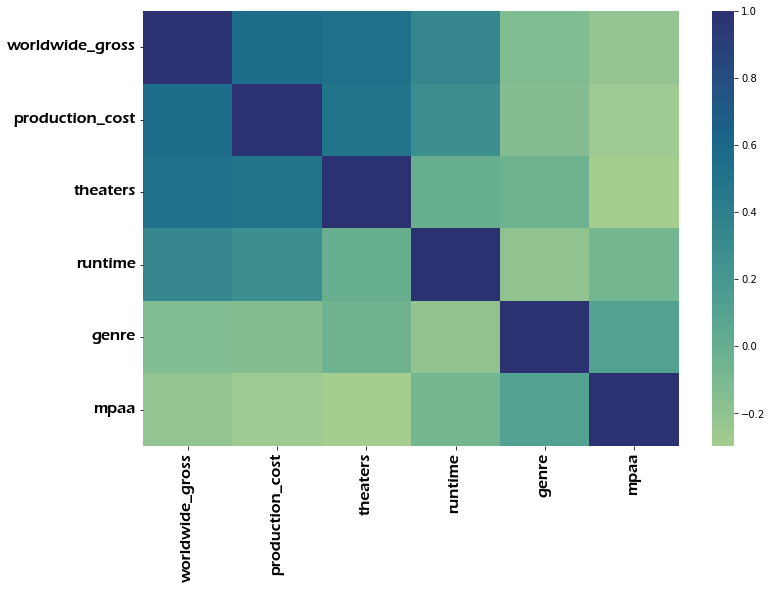

In [42]:
ax = sns.heatmap(data_for_ml.corr(), cmap='crest')
ax.figure.set_size_inches(12, 8)

plt.xticks(rotation=90, font=font, fontsize=16)
plt.yticks(rotation=360, font=font, fontsize=16)

plt.show()

**Production cost, theaters and runtime** have a great correlation with the final movie gross revenue.

## Preprocessing and the features importance

In [43]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# Preprocessing to optimize
X = scaler_x.fit_transform(data_for_ml.drop('worldwide_gross', axis=1))
y = scaler_y.fit_transform(data_for_ml[['worldwide_gross']])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=404)

# Linear Model
model = LinearSVR(random_state=404, max_iter=5000)
model.fit(x_train, np.squeeze(y_train)) # Squeeze the additional dimension of data

# Feature importance for a predict
feature_importances = model.coef_

# MSE
y_pred = model.predict(x_test)
print('Mean Squared Error -> %.2f' % mean_squared_error(y_test, y_pred))

Mean Squared Error -> 0.51


In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 5)
(143, 5)
(331, 1)
(143, 1)


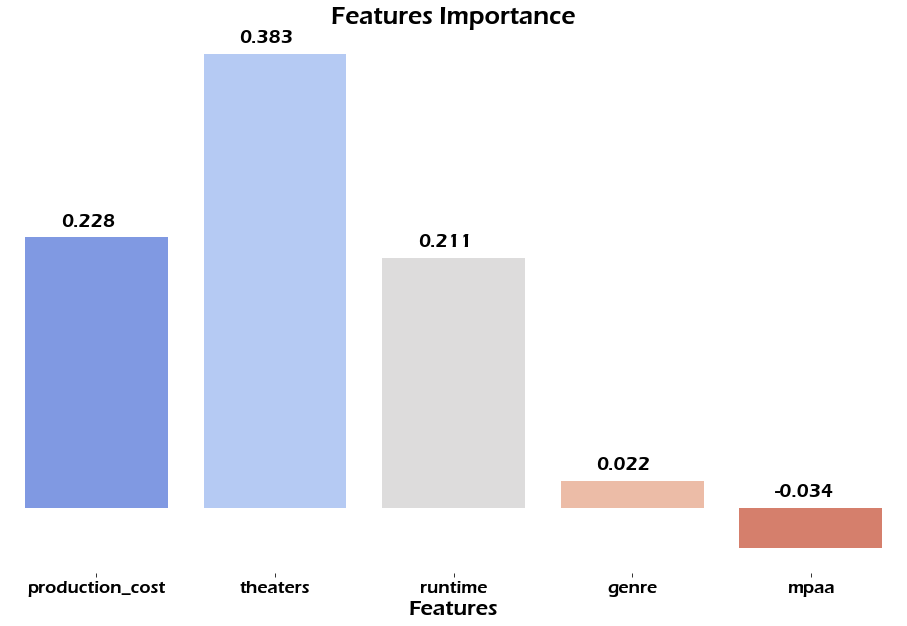

In [45]:
ax = sns.barplot(x = scaler_x.get_feature_names_out(), y = feature_importances, palette='coolwarm')
ax.figure.set_size_inches(16, 10)
plt.xticks(font=font, fontsize=18)
plt.yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title('Features Importance', font=font, fontsize=25)
ax.set_ylabel('')
ax.set_xlabel('Features', font=font, fontsize=22)

for i, feature_n in enumerate(feature_importances):
    text = str(round(feature_n, 3))
    x = i - 0.2
    y = max(feature_n, 0) + 0.01
    
    plt.text(s=text, x=x, y=y, font=font, fontsize=20)

plt.show()

**Production Cost, number of Theaters and Runtime** are the most important features to predict the movie worldwide gross revenue!

**Genre and Mpaa** are not relevant when it comes to movie gross revenue in this dataset.

## Showing the Predict

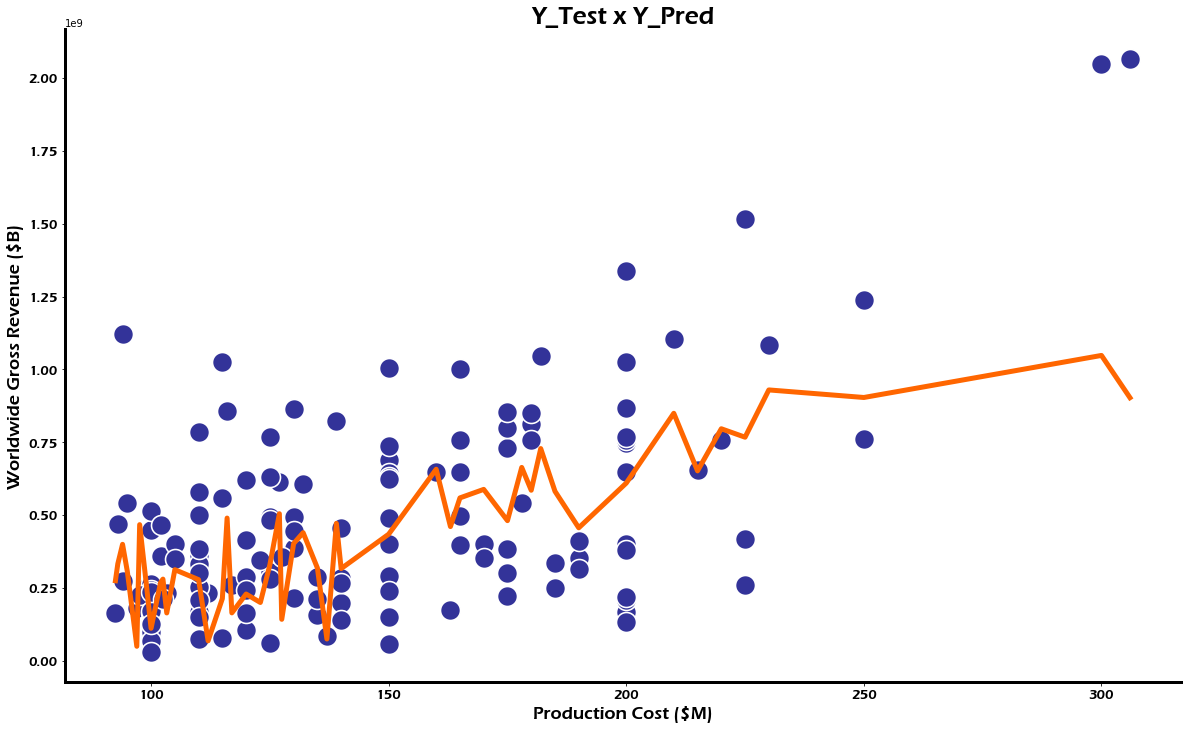

In [46]:
# Transform back to the real values and turn it to the right dimension
## Real Data
y_test_graph = np.squeeze(scaler_y.inverse_transform(y_test)) # Shape (143, 1)
x_test_graph = scaler_x.inverse_transform(x_test)[:, 0] / 1e6 # Transform to Millions

## Predicted Data
y_pred_graph = np.squeeze(scaler_y.inverse_transform([y_pred])) # Shape (143, 1)


# Real test Data plot
ax = sns.scatterplot(x = x_test_graph, y = y_test_graph, 
                     s = 400, color = '#333399')

ax.figure.set_size_inches(20, 12)
plt.xticks(font=font, fontsize=14)
plt.yticks(font=font, fontsize = 14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set(linewidth=3)
ax.spines['bottom'].set(linewidth=3)

ax.set_title('Y_Test x Y_Pred', font=font, fontsize=25)
ax.set_ylabel('Worldwide Gross Revenue ($B)', font=font, fontsize=18)
ax.set_xlabel('Production Cost ($M)', font=font, fontsize=18)

# Predicted Data Plot
sns.lineplot(x = x_test_graph, y = y_pred_graph, 
             err_style=None, linewidth=5, color = '#ff6600')

plt.show()

## Predicting New Movies

In [47]:
movie_data.query('worldwide_gross == 0')
# Chose a movie with 0 worldwide gross revenue.

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
8,9,2023-07-11,Mission: Impossible Dead Reckoning Part One,/movie/Mission-Impossible-Dead-Reckoning-Part-...,290000000,0,0,NaN,NaN,Action,NaN,NaN,2023.0
360,361,2019-03-06,Triple Frontier,/movie/Triple-Frontier-(2019)#tab=summary,115000000,0,0,NaN,R,Action,NaN,125.0,2019.0
235,236,2019-12-13,6 Underground,/movie/6-Underground-(2019)#tab=summary,150000000,0,0,NaN,R,Action,NaN,128.0,2019.0
260,261,NaN,Desert Warrior,/movie/Desert-Warrior-(2022-Saudi-Arabia)#tab=...,140000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
465,466,2020-06-12,Artemis Fowl,/movie/Artemis-Fowl-(2020)#tab=summary,100000000,0,0,NaN,PG,Adventure,NaN,115.0,2020.0
347,348,2018-11-09,Outlaw King,/movie/Outlaw-King-(2018)#tab=summary,120000000,0,0,NaN,R,Action,NaN,117.0,2018.0
348,349,2022-12-02,Emancipation,/movie/Emancipation-(2022)#tab=summary,120000000,0,0,NaN,NaN,Thriller/Suspense,NaN,132.0,2022.0
499,500,2023-03-09,65,/movie/65-(2022)#tab=summary,91000000,0,0,NaN,NaN,Thriller/Suspense,NaN,NaN,2023.0


In [48]:
# See if a value is NaN in DataFrame
def is_null(num):
    if num != num:
        return True
    return False

In [49]:
def predict_new_movie(id_movie_from_dataset):
    try:
        movie_to_test = movie_data.loc[id_movie_from_dataset]
    except KeyError:
        return -1

    # Complete if null the theaters number with the average
    if is_null(movie_to_test['theaters']):
        movie_to_test['theaters'] = movie_data['theaters'].mean() # Average Theaters to predict
    if is_null(movie_to_test['runtime']):
        movie_to_test['runtime'] = movie_data['runtime'].mean()

    # If is null complete with 'R' else it searchs in the mpaa dictionary the numerical matching value
    if is_null(movie_to_test['mpaa']):
        movie_to_test['mpaa'] = mpaa_dict['R']
    else:
        movie_to_test['mpaa'] = mpaa_dict[movie_to_test['mpaa']]

    # Transforms to numerical data
    movie_to_test['genre'] = genre_dict[movie_to_test['genre']]

    # Transforms with scaler to predict
    movie_data_predict = movie_to_test[scaler_x.get_feature_names_out()]
    movie_data_predict = scaler_x.transform([movie_data_predict.values])
        
    y_pred = model.predict(movie_data_predict)
    y_pred = scaler_y.inverse_transform([y_pred])
    
    return y_pred[0][0]

In [50]:
predict_new_movie(235)

408205187.07321656

In [51]:
def plot_neighbours(neighbours):
    palette = sns.color_palette('vlag', 3)
    ax = sns.barplot(data = neighbours, x = 'title', 
                     y = neighbours['worldwide_gross'] / 1e6, palette=palette)
    ax.figure.set_size_inches(20, 12)
    
    plt.xticks(font=font, fontsize = 26)
    plt.yticks([])    
    
    title = str(neighbours.iloc[1].title) + " predicted revenue will be between" 
    ax.set_title(title, font=font, fontsize=44)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Adding the Image for the decade Movie
    i = 0
    for index, row in neighbours.iterrows():
        # Adding the gross Text
        text = "$ %.2f M" % float(row['worldwide_gross'] / 1e6)
        if i == 1:
            text = "  Predicted \n" + text
        
        y = 40
        ax.text(s=text, x = i - 0.32, y = y, font=font, fontsize=42)    
        
        img = show_image(row['url'], row['title'], 1)
        if img is None:
            text = row['title']
            y = row['worldwide_gross'] / 1e6 - 50
            ax.text(s=text, x = i - 0.36, y = y, font=font, fontsize=42)
            i += 1
            continue
        
        pos_x = (0.035, 0.292, 0.552)
        pos_y = (0.392, 0.385, 0.375)
        
        newax1 = ax.figure.add_axes([pos_x[i],pos_y[i],0.44,0.44])
        newax1.imshow(img)
        newax1.axis('off')        
        i += 1

In [52]:
def show_predict_movie(id_movie_from_dataset):
    # Check for the movie ID and its predicted revenue
    movie_revenue = predict_new_movie(id_movie_from_dataset)
    
    if movie_revenue < 0:
        return "ID not found!"
    
    # Concatenate the movie with its new revenue value with the movie database
    movie_predicted = movie_data.loc[id_movie_from_dataset]    
    movie_predicted['worldwide_gross'] = int(movie_revenue)
    movie_predicted = pd.DataFrame(movie_predicted).T
     
    all_movies = pd.concat([movie_data_with_revenue[movie_data.columns], movie_predicted], ignore_index=True)
    all_movies.sort_values('worldwide_gross', ascending=False, inplace=True)
    all_movies = all_movies.reset_index()
    
    # Localizing the movie and picking the movie above and below
    index = all_movies[all_movies['rank'] == id_movie_from_dataset + 1].index[0]    
    neighbours_movies = all_movies.iloc[index-1 : index+2]
    
    plot_neighbours(neighbours_movies)
    
    return neighbours_movies[['release_date', 'title', 'production_cost', 'worldwide_gross']]

,release_date,title,production_cost,worldwide_gross
212,2017-09-19,Kingsman: The Golden Circle,104000000,408803696
213,2019-12-13,6 Underground,150000000,408205187
214,2003-04-30,X-Men 2,125000000,406348630


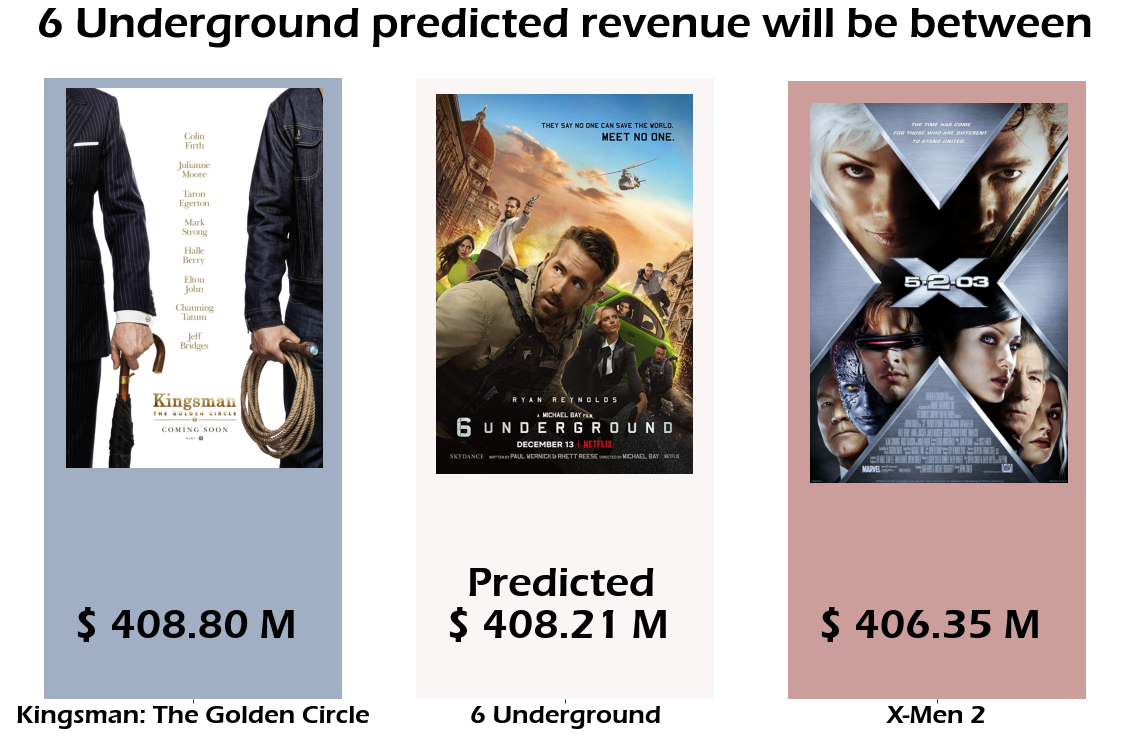

In [53]:
show_predict_movie(235) # 6 Underground

,release_date,title,production_cost,worldwide_gross
228,2013-12-25,The Wolf of Wall Street,100000000,389918903
229,2022-12-02,Emancipation,120000000,388496645
230,2009-05-08,Star Trek,140000000,386839614


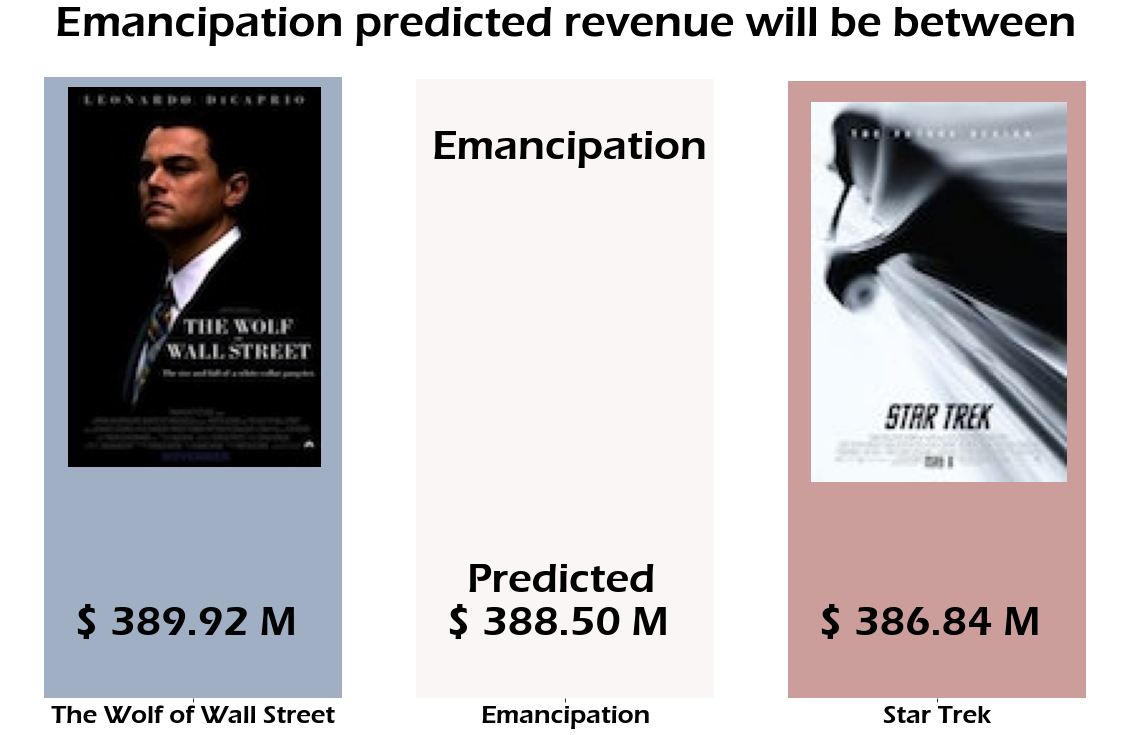

In [54]:
show_predict_movie(348) # Emancipation

,release_date,title,production_cost,worldwide_gross
222,2012-05-30,Snow White and the Huntsman,170000000,401021746
223,2021-11-04,Red Notice,150000000,400246373
224,2010-12-17,Tron: Legacy,200000000,399866199


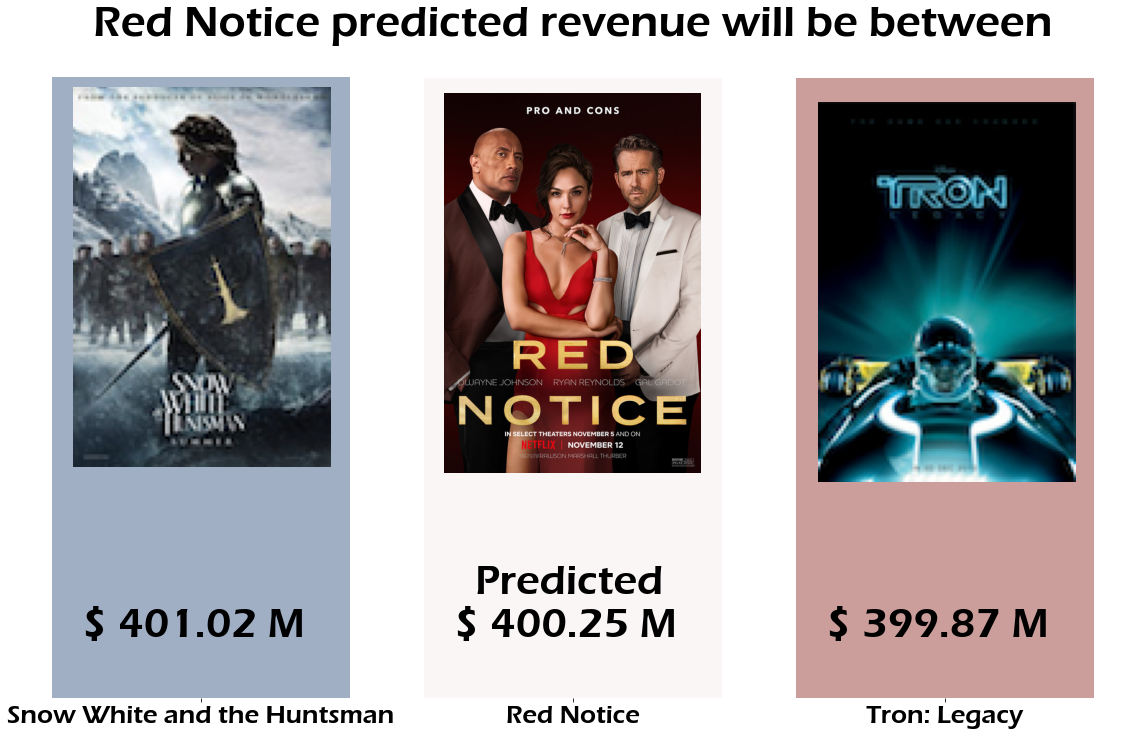

In [55]:
show_predict_movie(234) # Red Notice

# **Conclusion**
****

**●** **Disney movies dominated the movies with the highest profit**, with **Marvel** and **Star Wars** Movies. 

**Avatar** when lauched was from 20th Century Studios, **now it's also owned by Disney**.
****


**●** **Most movies with explosive opening didn't maintain the revenue through next weeks**, so ended with a gross revenue loss. 

In the other hand, **Frozen showed that an weak opening weekend doesn't mean that it will end up in a loss**, having a great profit.
****

**●** **Number of theaters have a great correlation with the domestic gross revenue from movie**, except from some movies like **Wonder Woman 1984, that had more than 4000 theaters and end up having a loss.** 

**The Lion King** was the movie that was shown in the most theaters.
****


**●** Successful movies have a great revenue per theater, **like Marvel and Star Wars movies**. **Avatar had an average of 226,877.10 dollars per theater**. **The Last Duel only had 3,541.25 dollars per theater**.
****

**●** **The average gross revenue from movies is increasing for years**, even with lockdowns around the world in 2020.
****

**●** **Lord of the Rings** and **The Hobbit** are the movies with the **most runtime**.

**Western and Drama Movies have the longer average runtime**, with 2h30 and 2h23, respectively.

**Movies that have children as the target public has an smaller average runtime**, as most of children movies are labeled as comedy, and 70% of comedy are G or PG, ratings that are in the most part suitable for children.
****


**●** **Musical movies has the most average profit**, while **Romantic Comedies have in average a loss**.
****


**●** **Production Cost, number of theaters and Runtime** of a movie are the most important features to predict the worldwide gross revenue.

**Thank for you for viewing the Notebook! I hope you enjoyed and learned something! If there is a constructive critic, leave a commment, it's a pleasure to improve together!**